# LiDAR Uncertainty at SOAP and NEON sites

## The SOAP site
![Soaproot Panorama](img/Soaproot_pano.jpeg)
Image credit: National Ecological Observtory Network, available at: https://www.neonscience.org/field-sites/soap

In [1]:
import os
import pathlib

import earthpy as et
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import SJERDataLoader, SOAPDataLoader 

et.data.get_data('spatial-vector-lidar')

home_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'spatial-vector-lidar'
)
os.chdir(home_dir)

Pseudocode for creating a class
---------------
NEONDataLoader object:

- takes:
      - name of the dataset
      - id column name
      - dictionary of formatting to apply to file paths
      - id modifier
- has:
      - name of dataset
      - id column name
      - paths
      - LiDAR GeoDataFrame (or ability to compute)
      - insitu DataFrame
      - merged GeoDataFrame    
- does:
      - loads LiDAR GeoDataFrame (propertty - also in has)
      - loads insitu DataFrame (propertty - also in has)
      - merged insitu and LiDAR data (propertty - also in has)
      - plot the data
      - (caching)
      - (save the plot to a file)

In [2]:
# Create instance of class for sjer (object) with sjer child class  
sjer_data_loader = SJERDataLoader()
sjer_data_loader.height_stats.head()
#sjer_data_loader.lidar_chm_stats() = chm_gdf
#sjer_data_loader.insitu_chm_stats() = insitu_df

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,insitu_max,insitu_mean
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,19.3,3.866667
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,23.9,8.221429
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,16.0,8.218750
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,11.0,6.512500
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,8.8,7.600000


In [3]:
# Create soap object using soap child class    
soap_data_loader = SOAPDataLoader()
soap_data_loader.height_stats.head()

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,insitu_max,insitu_mean
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,51.1,5.047000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,33.0,9.232787
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,28.1,6.050943
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,120.0,4.745902
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,19.7,2.530702


In [4]:
def plot_height(site_name, plot_gdf, ax1max, ax2max):
    """Plots the insitu vs lidar max and mean canopy height
    
    Parameters
    ----------
    site_name: str
        name of the site
        
    plot_gdf: gdf
        geodataframe containing plot ID and 
        lidar and insitue mean and max height
    
    ax1max: int 
        maximum lim for max height data 
    
    ax2max: int
        maximum lim for mean height data 
    
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    ax1.scatter(plot_gdf.lidar_max, plot_gdf.insitu_max)
    ax1.plot((0,1), (0,1), transform=ax1.transAxes, ls='--', c='k')
    sns.regplot(x='lidar_max', y='insitu_max',
                data=plot_gdf,
                color='blue',
                ax=ax1)
    ax1.set(xlim=(0,ax1max), ylim=(0,ax1max), aspect='equal',
           title=('Max canopy height: lidar vs insitu at {}'
                  .format(site_name)),
           xlabel='Lidar max height (m)',
           ylabel='In-situ max height (m)')
    ax1.xaxis.label.set_fontsize(14)
    ax1.yaxis.label.set_fontsize(14)
    ax1.title.set_fontsize(14)

    ax2.scatter(plot_gdf.lidar_mean, plot_gdf.insitu_mean)
    ax2.plot((0,1), (0,1), transform=ax2.transAxes, ls='--', c='k')
    sns.regplot(x='lidar_mean', y='insitu_mean',
                data=plot_gdf,
                color='blue',
                ax=ax2)
    ax2.set(xlim=(0,ax2max), ylim=(0,ax2max), aspect='equal',
           title=('Mean canopy height: lidar vs insitu at {}'
                  .format(site_name)),
           xlabel='Lidar mean height (m)',
           ylabel='In-situ mean height (m)')
    ax2.xaxis.label.set_fontsize(14)
    ax2.yaxis.label.set_fontsize(14)
    ax2.title.set_fontsize(14)

    plt.show()

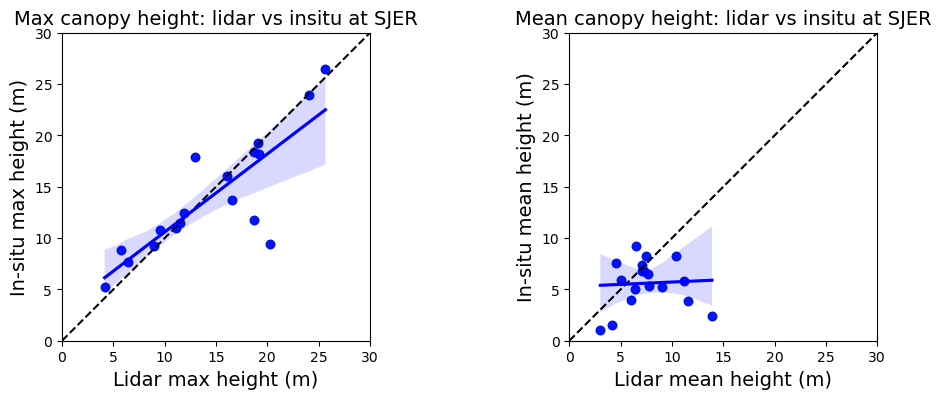

In [5]:
# Plot SJER mean and max data
plot_height(site_name='SJER',
           plot_gdf = sjer_data_loader.height_stats,
           ax1max = 30,
           ax2max = 30)

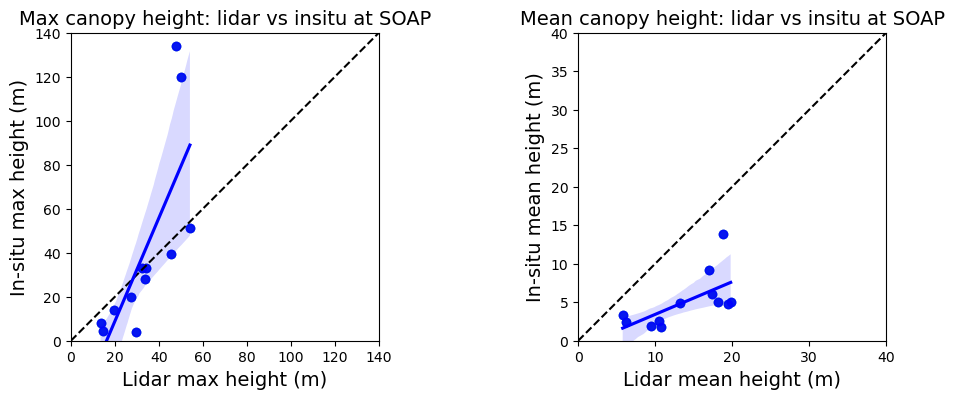

In [6]:
# Plot SOAP mean and max data
plot_height(site_name='SOAP',
           plot_gdf = soap_data_loader.height_stats,
           ax1max = 140,
           ax2max = 40)